In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

pd.set_option('display.max_columns', 100)

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial'],'size':'14'})

In [40]:
rec_df = pd.read_csv('data_for_recommendation_engine.csv')
games_df = pd.read_csv('games.csv')
user_df = pd.read_csv('../mod5-capstone/data/Kaggle/steam-200k.csv', 
                      header= None, 
                      index_col = None, 
                      names = ['UserID', 'Game', 'Action', 'Hours', 'Other'])

In [3]:
rec_df.head()

,Unnamed: 0,userid,game,hours_played,appid,name,release_date,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,mods,multi_player,online_co_op,online_multi_player,single_player,action,adventure,casual,early_access,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,p_metacritic,Free,Paid
0,0,5250,Alien Swarm,4.9,630.0,Alien Swarm,2010-07-19,Valve,Valve,0.0,66.0,18226.0,994.0,310.0,84.0,1000000.0,0.00,19220.0,0.948283,92.394066,2010.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.383988,1,0
1,1,5250,Cities Skylines,144.0,255710.0,Cities: Skylines,2015-03-10,Colossal Order Ltd.,Paradox Interactive,0.0,111.0,119378.0,9667.0,2090.0,666.0,5000000.0,29.99,129045.0,0.925088,91.170169,2015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,82.670419,0,1
2,2,5250,Counter-Strike,0.0,10.0,Counter-Strike,2000-11-01,Valve,Valve,0.0,0.0,159745.0,4173.0,21211.0,172.0,10000000.0,9.99,163918.0,0.974542,96.141982,2000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.423725,0,1
3,3,5250,Counter-Strike Source,0.0,240.0,Counter-Strike: Source,2004-11-01,Valve,Valve,0.0,147.0,105394.0,4359.0,9135.0,415.0,10000000.0,9.99,109753.0,0.960284,94.569366,2004.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.926946,0,1
4,4,5250,Day of Defeat,0.0,30.0,Day of Defeat,2003-05-01,Valve,Valve,0.0,0.0,4325.0,482.0,894.0,18.0,5000000.0,4.99,4807.0,0.899730,86.467857,2003.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.662717,0,1


In [4]:
rec_df.drop('Unnamed: 0', axis =1, inplace= True)

In [5]:
rec_df.head()

,userid,game,hours_played,appid,name,release_date,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,mods,multi_player,online_co_op,online_multi_player,single_player,action,adventure,casual,early_access,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,p_metacritic,Free,Paid
0,5250,Alien Swarm,4.9,630.0,Alien Swarm,2010-07-19,Valve,Valve,0.0,66.0,18226.0,994.0,310.0,84.0,1000000.0,0.00,19220.0,0.948283,92.394066,2010.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.383988,1,0
1,5250,Cities Skylines,144.0,255710.0,Cities: Skylines,2015-03-10,Colossal Order Ltd.,Paradox Interactive,0.0,111.0,119378.0,9667.0,2090.0,666.0,5000000.0,29.99,129045.0,0.925088,91.170169,2015.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,82.670419,0,1
2,5250,Counter-Strike,0.0,10.0,Counter-Strike,2000-11-01,Valve,Valve,0.0,0.0,159745.0,4173.0,21211.0,172.0,10000000.0,9.99,163918.0,0.974542,96.141982,2000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.423725,0,1
3,5250,Counter-Strike Source,0.0,240.0,Counter-Strike: Source,2004-11-01,Valve,Valve,0.0,147.0,105394.0,4359.0,9135.0,415.0,10000000.0,9.99,109753.0,0.960284,94.569366,2004.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.926946,0,1
4,5250,Day of Defeat,0.0,30.0,Day of Defeat,2003-05-01,Valve,Valve,0.0,0.0,4325.0,482.0,894.0,18.0,5000000.0,4.99,4807.0,0.899730,86.467857,2003.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.662717,0,1


In [7]:
print("Number of games : {0}".format(len(rec_df.game.unique())))
print("Number of users : {0}".format(len(rec_df.userid.unique())))

Number of games : 2726
Number of users : 10821


In [8]:
games_df.drop('Unnamed: 0', axis =1, inplace= True)

In [9]:
games_df.head()

,appid,name,release_date,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,mods,multi_player,online_co_op,online_multi_player,single_player,action,adventure,casual,early_access,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,p_metacritic,type
0,10,Counter-Strike,2000-11-01,Valve,Valve,0,Action,0,159745,4173,21211,172,10000000,9.99,163918,0.974542,96.141982,2000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,85.423725,Paid
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,0,Action,0,4335,771,798,11,2000000,4.99,5106,0.849001,81.652169,1999,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,76.355907,Paid
2,30,Day of Defeat,2003-05-01,Valve,Valve,0,Action,0,4325,482,894,18,5000000,4.99,4807,0.899730,86.467857,2003,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,78.662717,Paid
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,0,Action,0,1592,345,1200,8,5000000,4.99,1937,0.821890,77.979832,2001,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,74.989380,Paid
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,0,Action,0,8907,477,1316,281,5000000,4.99,9384,0.949169,91.893508,1999,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,82.020638,Paid


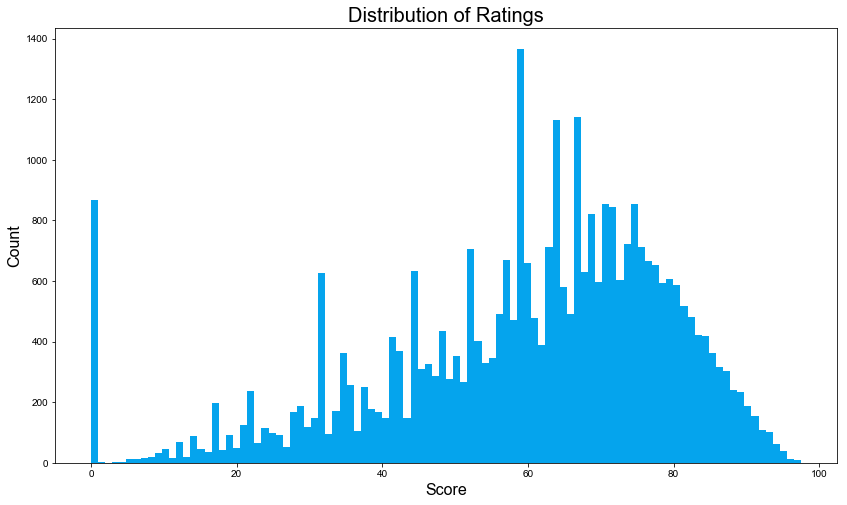

In [19]:
plt.figure(figsize=(14,8))
plt.hist(x=games_df['rating'],
         bins = 100,
         color = ['#05a4ed'])
plt.title('Distribution of Ratings', fontsize=20)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Count', fontsize =16);


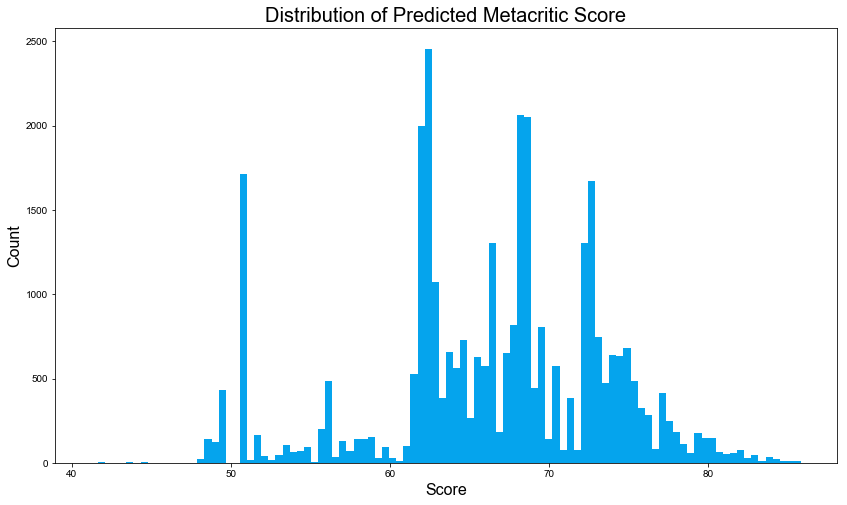

In [13]:
plt.figure(figsize=(14,8))
plt.hist(x=games_df['p_metacritic'],
         bins = 100,
         color = ['#05a4ed'])
plt.title('Distribution of Predicted Metacritic Score', fontsize=20)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Count', fontsize =16);

In [14]:
top_25 = games_df.nlargest(25, 'rating')

bot_10 = games_df.nsmallest(10, 'rating')

big_90 = games_df[games_df['rating']>=90]

In [16]:
big_90.shape

(614, 36)

In [22]:
top_25.sort_values('rating', ascending = False)

,appid,name,release_date,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,mods,multi_player,online_co_op,online_multi_player,single_player,action,adventure,casual,early_access,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,p_metacritic,type
23,620,Portal 2,2011-04-18,Valve,Valve,0,Action;Adventure,51,204742,2555,1012,508,10000000,9.99,207297,0.987675,97.528303,2011,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,84.399467,Paid
7397,427520,Factorio,2016-02-25,Wube Software LTD.,Wube Software LTD.,0,Casual;Indie;Simulation;Strategy;Early Access,38,81225,1023,5619,2223,2000000,30.00,82248,0.987562,97.119638,2016,0,1,1,0,1,0,0,1,1,1,0,0,0,1,0,1,85.703166,Paid
2933,292030,The Witcher® 3: Wild Hunt,2015-05-18,CD PROJEKT RED,CD PROJEKT RED,0,RPG,78,395156,7710,4062,1511,5000000,39.99,402866,0.980862,97.078687,2015,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,85.842985,Paid
7555,431960,Wallpaper Engine,2018-11-16,Wallpaper Engine Team,Wallpaper Engine Team,0,Casual;Indie;Animation & Modeling;Design & Ill...,17,208022,3699,2641,525,10000000,3.99,211721,0.982529,97.027991,2018,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,85.423725,Paid
1127,105600,Terraria,2011-05-16,Re-Logic,Re-Logic,0,Action;Adventure;Indie;RPG,89,562570,12506,6233,1995,20000000,9.99,575076,0.978253,96.922574,2011,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,85.423725,Paid
3003,294100,RimWorld,2018-10-17,Ludeon Studios,Ludeon Studios,0,Indie;Simulation;Strategy,0,79611,1411,9134,4133,2000000,34.99,81022,0.982585,96.622805,2018,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,85.703166,Paid
1958,250900,The Binding of Isaac: Rebirth,2014-11-04,"Nicalis, Inc.","Nicalis, Inc.",18,Action,403,109008,2157,5231,2901,2000000,14.99,111165,0.980596,96.575513,2014,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,85.423725,Paid
17,400,Portal,2007-10-10,Valve,Valve,0,Action,15,73123,1308,414,180,5000000,9.99,74431,0.982427,96.564929,2007,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,83.289301,Paid
11264,546560,Half-Life: Alyx,2020-03-23,Valve,Valve,0,Action;Adventure,41,37048,520,769,1112,1000000,59.99,37568,0.986158,96.546866,2020,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,84.818727,Paid
7012,413150,Stardew Valley,2016-02-26,ConcernedApe,ConcernedApe,0,Indie;RPG;Simulation,40,255752,6206,3078,1788,5000000,14.99,261958,0.976309,96.489337,2016,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,85.423725,Paid


In [23]:
bot_10.sort_values('rating')

,appid,name,release_date,developer,publisher,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,total_ratings,rating_ratio,rating,release_year,mods,multi_player,online_co_op,online_multi_player,single_player,action,adventure,casual,early_access,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,p_metacritic,type
589,32000,Raycatcher,2009-04-17,Thinking Studios;Slam Dunk Studios,Thinking Studios,0,Indie;Casual,0,0,13,0,0,0,4.99,13,0.0,0.0,2009,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,50.732637,Paid
699,36900,Angle of Attack,2009-08-17,3000AD,3000AD,0,Action;Simulation,0,0,3,0,0,0,9.99,3,0.0,0.0,2009,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,49.653372,Paid
2473,272920,Rail Adventures,2019-06-21,exosyphen studios,exosyphen studios,0,Action;Indie;Racing;Early Access,0,0,1,0,0,0,5.99,1,0.0,0.0,2019,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,50.732637,Paid
4681,347050,Vol'Talkes - The AI War,2015-02-25,HyperDrive Games,HyperDrive Games,0,Indie;Strategy;Early Access,0,0,2,0,0,0,29.99,2,0.0,0.0,2015,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,48.910629,Paid
5363,365290,House of Nightmares B-Movie Edition,2015-04-22,Morphodox Studios,Morphodox Studios,0,Indie;Early Access,0,0,1,0,0,0,0.99,1,0.0,0.0,2015,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,50.732637,Paid
5371,365400,Spoko and Poko,2015-05-11,LemonOrange,LemonOrange,0,Action;Adventure;Casual;Indie;RPG,25,0,6,0,0,20000,3.99,6,0.0,0.0,2015,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,50.732637,Paid
5725,374970,Golf Masters,2020-07-13,Ghost Machine,Ghost Machine,0,Casual;Indie;Simulation;Sports,0,0,2,0,0,0,9.99,2,0.0,0.0,2020,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,49.653372,Paid
5903,380130,Warhawks,2020-07-10,Ghost Machine,Ghost Machine,0,Action;Indie,0,0,1,0,0,0,4.99,1,0.0,0.0,2020,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,50.732637,Paid
6054,384900,Temporal Shift,2015-07-16,Four Lights,Four Lights,0,Action;Simulation;Strategy;Early Access,0,0,2,0,0,0,9.99,2,0.0,0.0,2015,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,49.653372,Paid
6168,387890,Radial Impact,2015-08-03,Devin Sherry,Devin Sherry,0,Casual;Indie,0,0,6,0,0,0,0.99,6,0.0,0.0,2015,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,50.732637,Paid


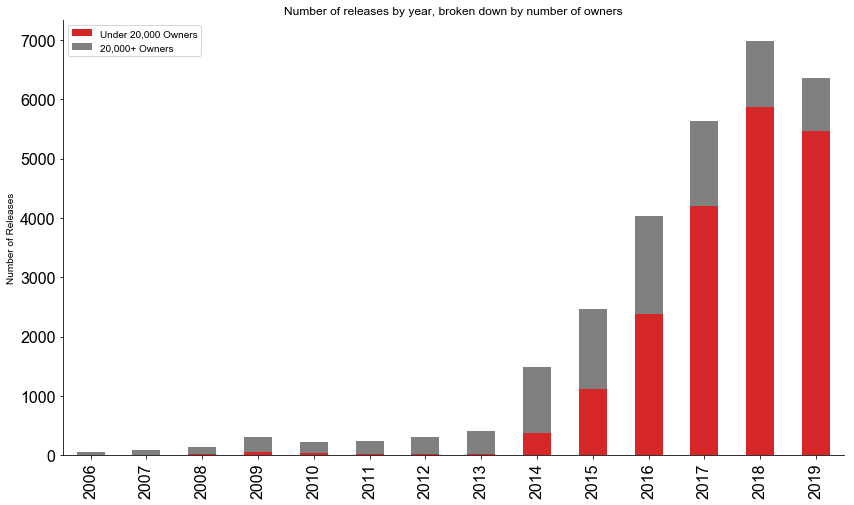

In [38]:
df = games_df.copy()
years = []
lt_20k = []
gt_20k = []
for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2019:
        
        continue
    # subset dataframe by year
    year_df = df[df.release_year == year]
    # calculate total with less than 20,000 owners, and total with 20,000 or more
    total_lt_20k = year_df[year_df.owners < 20000].shape[0]
    total_gt_20k = year_df[year_df.owners >= 20000].shape[0]
    years.append(year)
    lt_20k.append(total_lt_20k)
    gt_20k.append(total_gt_20k)
owners_df = pd.DataFrame(zip(years, lt_20k, gt_20k), 
                         columns=['year', 'Under 20,000 Owners', '20,000+ Owners'])


ax = owners_df.plot(x='year', 
                    y=[1, 2], 
                    kind='bar', 
                    stacked=True, 
                    color=['tab:red', 'gray'],
                    figsize=(14,8),
                    fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Number of Releases')
ax.set_title('Number of releases by year, broken down by number of owners')
sns.despine()
plt.show()

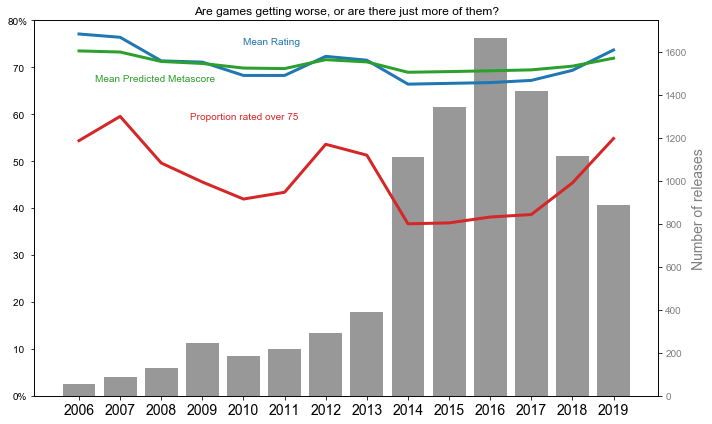

In [37]:
# Keeping games with only 20,000 owners or more
df = games_df[games_df.owners >= 20000].copy()
rating_threshold = 75
years = []
proportions = []
totals = []
avg_ratings = []
max_ratings = []
avg_metascores = []

# calculate values for plotting
for year in sorted(df['release_year'].unique()):
    if year < 2006 or year > 2019:
        continue
    year_data = df[df['release_year'] == year]
    total = year_data.shape[0]
    n_high_rating = year_data[year_data['rating'] >= rating_threshold].shape[0]
    avg_rating = year_data['rating'].mean() / 100
    avg_metascore =year_data['p_metacritic'].mean() /100
    years.append(year)
    totals.append(total)
    proportions.append(n_high_rating/total)
    avg_ratings.append(avg_rating)
    avg_metascores.append(avg_metascore)
    # print(f'{year} | {n_high_rating/total:.2f}')
fig, ax1 = plt.subplots(figsize=(10,6))

# ensure lines drawn over bars
ax1.set_zorder(1)
ax1.patch.set_visible(False)


# plot trendlines
ax1.plot(avg_ratings, color='tab:blue', label='Average Rating', linewidth=3)
ax1.plot(proportions, color='tab:red', label=f'Proportion of games rated over {rating_threshold}', linewidth=3)
ax1.plot(avg_metascores, color='tab:green', label='Average Metascore', linewidth=3)
x_pos = np.arange(len(years))
ax1.set_xticks(x_pos)
ax1.set_xticklabels(years, fontsize=14)
ax1.set_yticks(np.arange(0, 0.9, 0.1))
ax1.set_yticklabels(['0%', '10 ', '20 ', '30 ', '40 ', '50 ', '60 ', '70 ', '80%'])

# instead of legend, place text directly over lines
ax1.text(4, 0.75, 'Mean Rating', color='tab:blue')
ax1.text(2.7, 0.59, 'Proportion rated over 75', color='tab:red')
ax1.text(.4, 0.67, 'Mean Predicted Metascore', color='tab:green')

# allow multiple axis on same plot
ax2 = ax1.twinx()


# plot number of releases by year
color = 'tab:gray'
ax2.bar(x_pos, totals, color=color, alpha=.8)
ax2.set_ylabel('Number of releases', color=color, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Are games getting worse, or are there just more of them?')
fig.tight_layout()
plt.show()

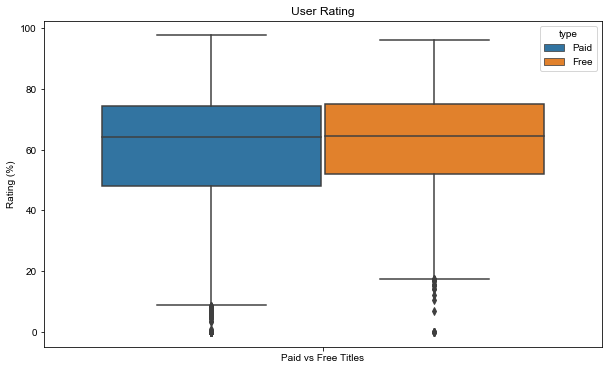

In [29]:
fig = plt.figure(figsize=(10,6))

df1 = games_df.copy()
df1['subset'] = 'Paid vs Free Titles'
ax = sns.boxplot(x='subset', y='rating', hue='type', data=df1)
plt.title('User Rating')
ax.set(xlabel='', ylabel='Rating (%)')
plt.show()

In [41]:
user_df.head()

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [43]:
user_df.loc[user_df['Action']== 'play'].describe()

,UserID,Hours,Other
count,7.048900e+04,70489.000000,70489.0
mean,1.058812e+08,48.878063,0.0
std,7.150365e+07,229.335236,0.0
min,5.250000e+03,0.100000,0.0
25%,4.934256e+07,1.000000,0.0
50%,9.169067e+07,4.500000,0.0
75%,1.556738e+08,19.100000,0.0
max,3.099031e+08,11754.000000,0.0


In [46]:
values = user_df.groupby(['UserID', 'Action']).size()
values.head()

UserID  Action  
5250    play         6
        purchase    21
76767   play        20
        purchase    36
86540   play        15
dtype: int64

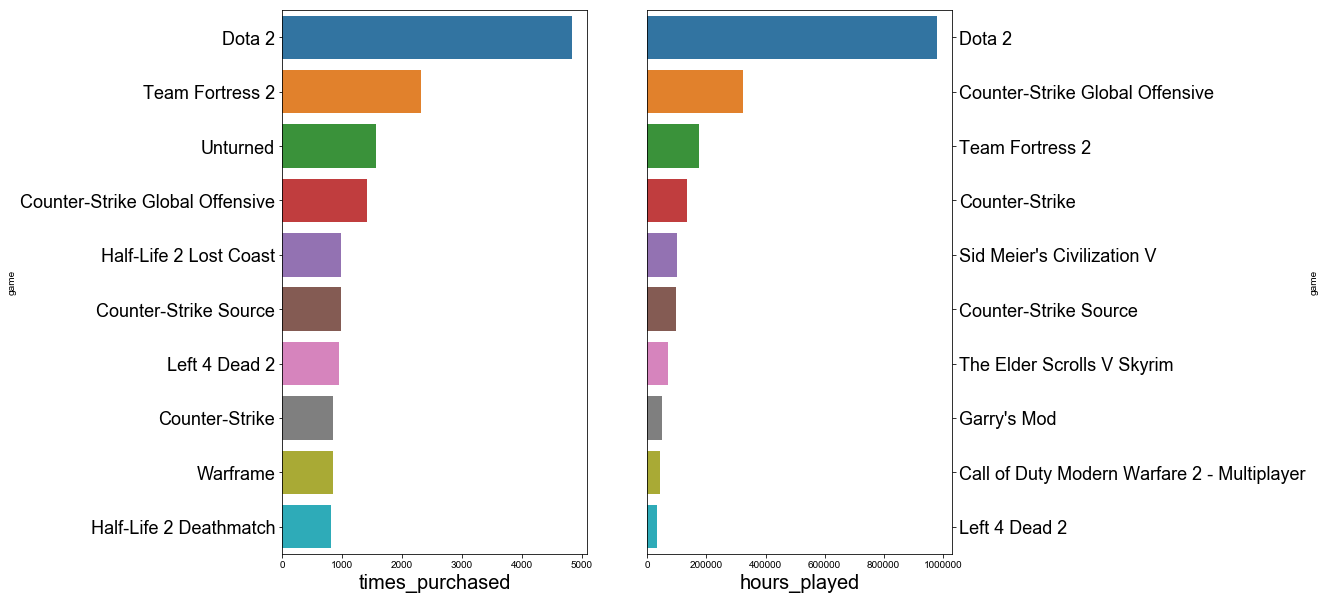

In [48]:
df = user_df.copy()
nb_games = 10
df_purchase = df.loc[df['Action'] == 'purchase']
purchased_times = df_purchase.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
purchased_times = pd.DataFrame({'game': purchased_times.index, 'times_purchased': purchased_times.values})[0:nb_games]
df_play = df.loc[df['Action'] == 'play']
hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]
fig, ax =plt.subplots(1,2,figsize=(12,nb_games))
sns.barplot(y = 'game', x = 'times_purchased', data = purchased_times, ax=ax[0])
sns.barplot(y = 'game', x = 'hours_played', data = hours_played, ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
for i in range(0,2):
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)

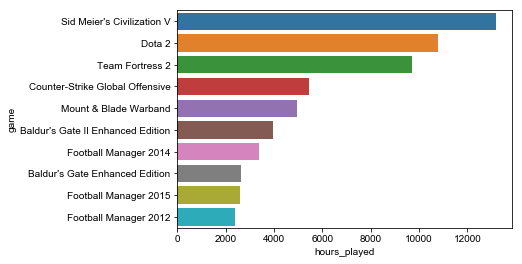

In [49]:
top = 10
user_counts = df.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False)[0:top]
mask = df['UserID'].isin(user_counts.index)
df_infos_user = df.loc[mask].loc[df['Action'] == 'play']
hours_played = df_infos_user.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]
sns.barplot(y = 'game', x = 'hours_played', data = hours_played)